In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connection to DB

In [2]:
con = sqlite3.connect('communes.db')

# SQLs

In [3]:
comptes_test = pd.read_sql_query("SELECT * FROM COMPTES LIMIT 10", con)

In [4]:
comptes_test

,COMPTE,LIBELLE
0,1,Comptes de capitaux
1,2,Comptes d'immobilisations
2,3,Comptes de stocks et en cours
3,4,Comptes de tiers
4,5,Comptes financiers
5,6,Comptes de charges
6,7,Comptes de produits
7,8,Comptes spéciaux
8,10,Dotations fonds divers et réserves
9,11,Report à nouveau - solde créditeur ou débiteur


In [5]:
balances_test = pd.read_sql_query("SELECT EXER,LBUDG,SUM(SD),SUM(SC) FROM BALANCES WHERE NOMEN='M14' \
                                   and CAST(COMPTE as TEXT) like '10%'\
                                   GROUP BY EXER,LBUDG", con)

In [6]:
balances_test['TOT'] = balances_test['SUM(SC)'] - balances_test['SUM(SD)']

In [7]:
balances_test[balances_test['TOT'] == balances_test['TOT'].max()]

,EXER,LBUDG,SUM(SD),SUM(SC),TOT
18011,2018,MARSEILLE,34942448.27,3.522810e+09,3.487868e+09


In [8]:
balances_test[balances_test['TOT'] == balances_test['TOT'].min()]

,EXER,LBUDG,SUM(SD),SUM(SC),TOT
16989,2018,LOTS COMMUNAUX SOTTEVAST (ENTREPRISES),92808.0,0.0,-92808.0


(array([12946.,  6259.,  3320.,  1936.,  1334.,   979.,   700.,   593.,
          486.,   383.,   310.,   277.,   251.,   209.,   180.,   165.,
          144.,   118.,   123.,    98.,    93.,    82.,    83.,    73.,
           75.,    51.,    58.,    47.,    53.,    42.,    41.,    41.,
           36.,    26.,    34.,    33.,    23.,    31.,    22.,    23.,
           20.,    16.,    23.,    27.,    21.,    16.,    14.,    16.,
           17.]),
 array([       0,  2000000,  4000000,  6000000,  8000000, 10000000,
        12000000, 14000000, 16000000, 18000000, 20000000, 22000000,
        24000000, 26000000, 28000000, 30000000, 32000000, 34000000,
        36000000, 38000000, 40000000, 42000000, 44000000, 46000000,
        48000000, 50000000, 52000000, 54000000, 56000000, 58000000,
        60000000, 62000000, 64000000, 66000000, 68000000, 70000000,
        72000000, 74000000, 76000000, 78000000, 80000000, 82000000,
        84000000, 86000000, 88000000, 90000000, 92000000, 94000000,
      

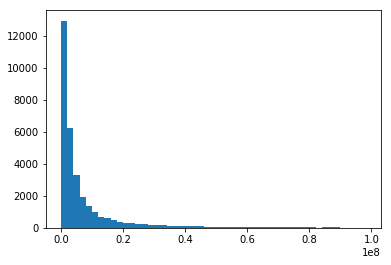

In [9]:
plt.hist(balances_test['TOT'],bins=[i for i in range(0,100000000,2000000)])